In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#фильтр предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ("BankChurners.csv")
print("Формат данных : {} ".format(data.shape))
data.head()

Формат данных : (10127, 23) 


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
str1 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"
str2 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
data.rename(columns={str1 : "pred1", str2 : "pred2"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
cat_columns = data.select_dtypes(include = ['object'])
unique_values = cat_columns.nunique(dropna=False)
print (unique_values)

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64


In [5]:
col = np.unique(data['Attrition_Flag'].values)
print (col)
#Приводим категориальные факторы к числовым выражениям, где attrited = 0 и existing = 1
data.loc[data['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0
data.loc[data['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 1
data['Attrition_Flag'] = data['Attrition_Flag'].astype(int)

['Attrited Customer' 'Existing Customer']


In [6]:
col = np.unique(data['Gender'].values)
print (col)
# Приводим категориальные факторы к числовым выражениям, где "M" = 0 и "F" = 1
data.loc[data['Gender'] == 'M', 'Gender'] = 0
data.loc[data['Gender'] == 'F', 'Gender'] = 1
data['Gender'] = data['Gender'].astype(int)

['F' 'M']


In [7]:
col = np.unique(data['Education_Level'].values)
print (col)
# Категориальные данные в числовые
data.loc[data['Education_Level'] == 'College', 'Education_Level'] = 14
data.loc[data['Education_Level'] == 'Doctorate', 'Education_Level'] = 21
data.loc[data['Education_Level'] == 'Graduate', 'Education_Level'] = 16
data.loc[data['Education_Level'] == 'High School', 'Education_Level'] = 12
data.loc[data['Education_Level'] == 'Post-Graduate', 'Education_Level'] = 18
data.loc[data['Education_Level'] == 'Uneducated', 'Education_Level'] = 8
data.loc[data['Education_Level'] == 'Unknown', 'Education_Level'] = 0
data['Education_Level'] = data['Education_Level'].astype(int)

['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']


In [8]:
col = np.unique(data['Income_Category'].values)
print (col)
# Категориальные данные в числовые
data.loc[data['Income_Category'] == 'Less than $40K', 'Income_Category'] = 30
data.loc[data['Income_Category'] == '$40K - $60K', 'Income_Category'] = 50
data.loc[data['Income_Category'] == '$60K - $80K', 'Income_Category'] = 70
data.loc[data['Income_Category'] == '$80K - $120K', 'Income_Category'] = 100
data.loc[data['Income_Category'] == '$120K +', 'Income_Category'] = 150
data.loc[data['Income_Category'] == 'Unknown', 'Income_Category'] = 0
data['Income_Category'] = data['Income_Category'].astype(int)

['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


In [9]:
col = np.unique(data['Card_Category'].values)
print (col)
# Категориальные данные в числовые
data.loc[data['Card_Category'] == 'Blue', 'Card_Category'] = 1
data.loc[data['Card_Category'] == 'Silver', 'Card_Category'] = 2
data.loc[data['Card_Category'] == 'Gold', 'Card_Category'] = 3
data.loc[data['Card_Category'] == 'Platinum', 'Card_Category'] = 4
data['Card_Category'] = data['Card_Category'].astype(int)

['Blue' 'Gold' 'Platinum' 'Silver']


In [10]:
data = pd.get_dummies(data, drop_first = True)

data.info()
print (data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
col = data['Income_Category']
mode = col.mode()[0]
data.loc[data['Income_Category'] == 0, 'Income_Category'] = mode

col = data['Education_Level']
mode = col.mode()[0]
data.loc[data['Education_Level'] == 0, 'Education_Level'] = mode

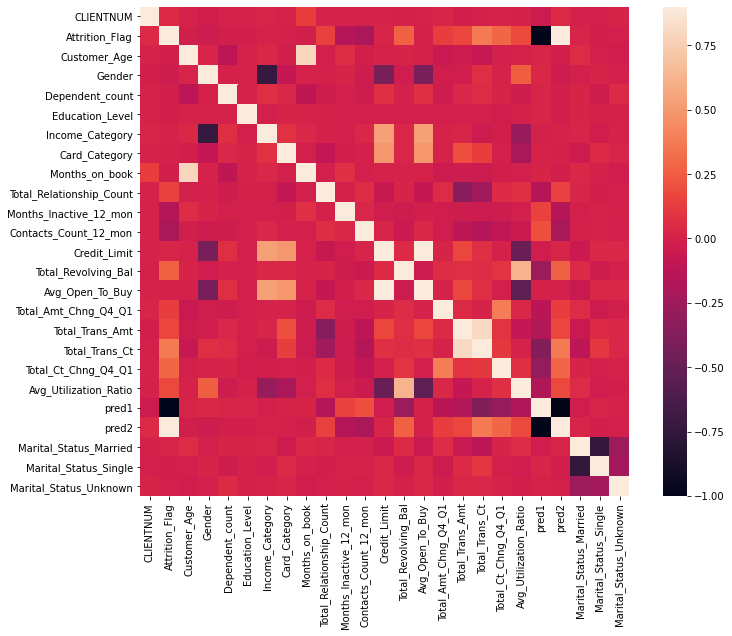

In [12]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()
#тепловая корр. диаграмма

In [13]:
used_data = data.drop (['CLIENTNUM', 'pred1', 'pred2', 'Attrition_Flag'], axis=1)
X = used_data.values 
y = data['Attrition_Flag'].values
y2 = data['pred1'].values
y3 = data['pred2'].values

In [14]:
"% of 1s in label:", y.mean()

('% of 1s in label:', 0.8393403772094401)

In [15]:
import imblearn

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample (X,y)
print ("После SMOTE: % of 1s in label:", y_res.mean())

После SMOTE: % of 1s in label: 0.5


In [24]:
for feature in range (X.shape[1]):
    min = X_res[:,feature].min()
    max = X_res[:,feature].max()
    X_res[:,feature] = (X_res[:,feature]-min) / (max-min)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_res, y_res, test_size=0.2, random_state=42)
print("Размер тренировочного датасета : {} ".format(X_train.shape))
print("Размер тестового датасета : {} ".format(X_test.shape))

Размер тренировочного датасета : (13600, 21) 
Размер тестового датасета : (3400, 21) 


In [26]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(X_train,y_train)
dct_training_score = 100*dct.score(X_train, y_train)
print ('Глубина дерева:', dct.get_depth())
print ('Ветви деревьев:', dct.get_n_leaves())
dct_test_score = 100*dct.score(X_test, y_test)
print("Точность дерева решений. Тренировочные : {:.2f}%, Тестовые: {:.2f}%. ".format(dct_training_score, dct_test_score))

Глубина дерева: 21
Ветви деревьев: 459
Точность дерева решений. Тренировочные : 100.00%, Тестовые: 95.09%. 


[ 78.13  78.13  86.79  91.18  93.28  94.62  95.92  96.88  97.68  98.35
  98.76  99.2   99.51  99.68  99.82  99.89  99.95  99.98  99.99  99.99
 100.  ]
[78.24 78.24 85.24 90.79 92.47 93.35 94.35 95.12 95.44 95.56 95.59 95.56
 95.32 95.53 95.74 95.44 95.35 95.44 95.35 95.12 95.15]


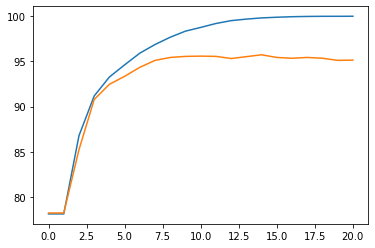

In [27]:
max_d = dct.get_depth()
dct_training_score, dct_test_score = np.zeros(max_d), np.zeros(max_d)
for i in range (max_d):
  dct = DecisionTreeClassifier(max_depth=i+1)
  dct.fit(X_train,y_train)
  dct_training_score[i] = 100*dct.score(X_train, y_train)
  dct_test_score[i] = 100*dct.score(X_test, y_test)

print (np.around (dct_training_score, decimals=2))  
print (np.around (dct_test_score, decimals=2))
plt.plot (dct_training_score)
plt.plot(dct_test_score)
plt.show()

In [28]:
features = used_data.columns
importances = dct.feature_importances_
leading_indices = (-importances).argsort()[:23]
print ("Самые важные факторы:")
for i in range (21):
    print (i+1, features[leading_indices[i]], round(100*importances[leading_indices[i]],2), '%')

Самые важные факторы:
1 Total_Trans_Ct 44.72 %
2 Total_Trans_Amt 18.97 %
3 Total_Revolving_Bal 8.38 %
4 Total_Relationship_Count 6.95 %
5 Total_Ct_Chng_Q4_Q1 5.16 %
6 Total_Amt_Chng_Q4_Q1 2.42 %
7 Months_Inactive_12_mon 2.24 %
8 Customer_Age 2.01 %
9 Marital_Status_Single 1.94 %
10 Credit_Limit 1.51 %
11 Contacts_Count_12_mon 1.12 %
12 Avg_Open_To_Buy 0.9 %
13 Avg_Utilization_Ratio 0.9 %
14 Months_on_book 0.67 %
15 Dependent_count 0.48 %
16 Income_Category 0.47 %
17 Gender 0.41 %
18 Education_Level 0.35 %
19 Marital_Status_Unknown 0.3 %
20 Card_Category 0.06 %
21 Marital_Status_Married 0.03 %
